In this lab we will characterize a system with the tools discussed so far in this course. We will characterize Setup #3, a Google cloud machine setup with three VM instances.

In [106]:
# Press Shift+Enter to run this cell
crsid='dtz22' #your crsid
machA_ip = '35.199.70.158'
machB_ip = '35.198.49.127'
machC_ip = '35.198.60.103'
num_pings = 50
import numpy as np
%matplotlib inline
%run ./useful.py
%run ./useful1.py


First run: `source ./setup.sh <crsid>` to setup your directory for storing the experiment data and results.

**Experiment 1**

Our first step is to check the connectivity of the setup, to test that all three machines are connected properly and can communicate, with the ping tool. We ping each machine 50 times from each other machine with interval 0.2 seconds, the minimum Google cloud allows, repeat this trial 10 times, and plot the CDFs of the average RTTs for all 50 pings, across all 10 trials and between all pairs of machines.

In [80]:
ssh = ssh_connect(machA_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ab_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machB_ip, num_pings),ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_ac_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machC_ip, num_pings),ssh)
        f.write(output)
ssh.close()

In [82]:
ssh = ssh_connect(machB_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ba_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machA_ip, num_pings),ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_bc_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machC_ip, num_pings),ssh)
        f.write(output)
ssh.close()

In [83]:
ssh = ssh_connect(machC_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ca_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machA_ip, num_pings),ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_cb_'+str(i),'w+') as f:
        output = ssh_cmd('ping {} -c {} -i 0.2 | grep -e "ttl"'.format(machB_ip, num_pings),ssh)
        f.write(output)
ssh.close()

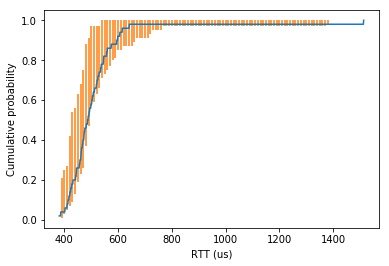

In [84]:
graph1('exp1_ab', crsid, 10.0, num_pings)

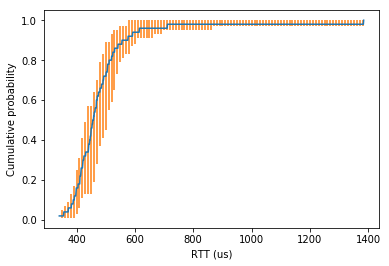

In [85]:
graph1('exp1_ac', crsid, 10.0, num_pings)

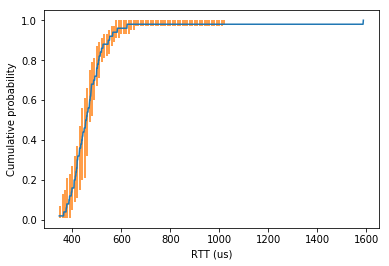

In [86]:
graph1('exp1_ba', crsid, 10.0, num_pings)

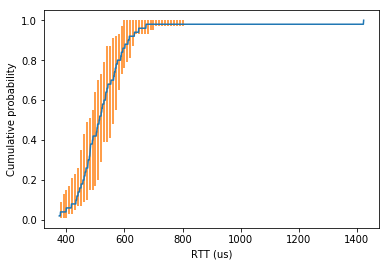

In [87]:
graph1('exp1_bc', crsid, 10.0, num_pings)

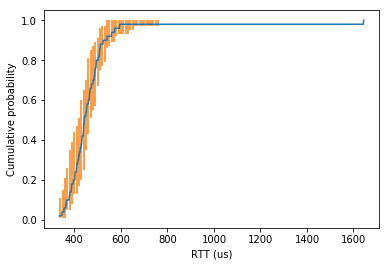

In [88]:
graph1('exp1_ca', crsid, 10.0, num_pings)

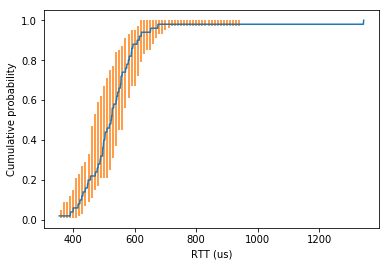

In [89]:
graph1('exp1_cb', crsid, 10.0, num_pings)

In [90]:
np.median(getrtts('exp1_ab', crsid))

481.5

In [91]:
np.median(getrtts('exp1_ba', crsid))

457.0

In [92]:
np.median(getrtts('exp1_ac', crsid))

464.5

What do we see? Well, the RTTs between the pairs of machines all show a median RTT of around 450 microseconds. But there seems to consistently, across all 6 connection pairs, be a rather long tail, implying that specific pings take a long time. Let's explore that further, by looking at a single connection, A to B. 

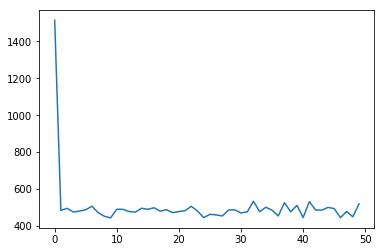

In [99]:
graph2('exp1_ab', crsid, 10.0, num_pings)

This same shape holds true over all 6 connections. So the first ping of the 50 consistently takes significantly longer than the others. This is probably just due to having to find the correct entry of the other machine in the ARP table, so let's retry those figures ignoring the first ping.

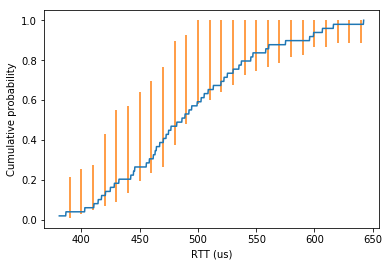

In [108]:
graph3('exp1_ab', crsid, 10.0, num_pings-1)

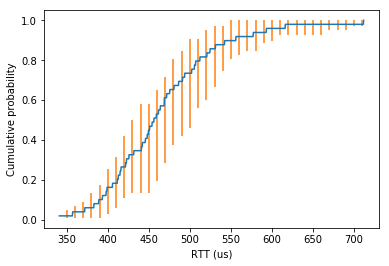

In [109]:
graph3('exp1_ac', crsid, 10.0, num_pings-1)

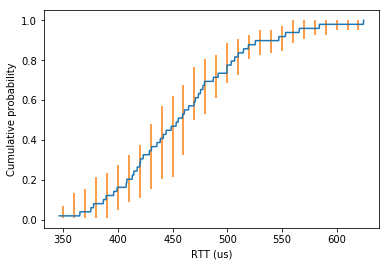

In [110]:
graph3('exp1_ba', crsid, 10.0, num_pings-1)

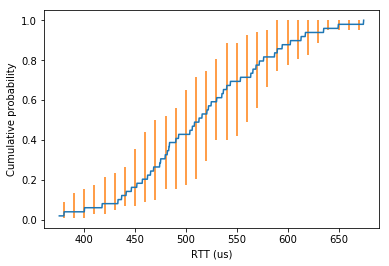

In [111]:
graph3('exp1_bc', crsid, 10.0, num_pings-1)

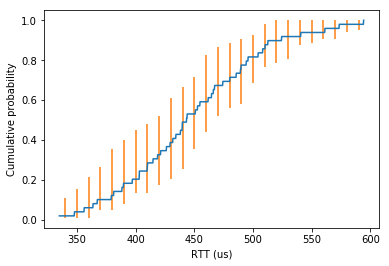

In [112]:
graph3('exp1_ca', crsid, 10.0, num_pings-1)

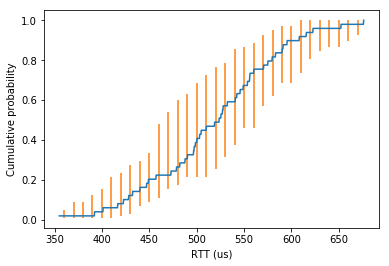

In [113]:
graph3('exp1_cb', crsid, 10.0, num_pings-1)

**Experiment 2**

Next we investigate the general topology of the setup using `traceroute`.